In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<H4> -Use Pandas to import the data from epa-sea-level.csv.

In [2]:
df = pd.read_csv('epa-sea-level.csv')

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


<H4> - Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

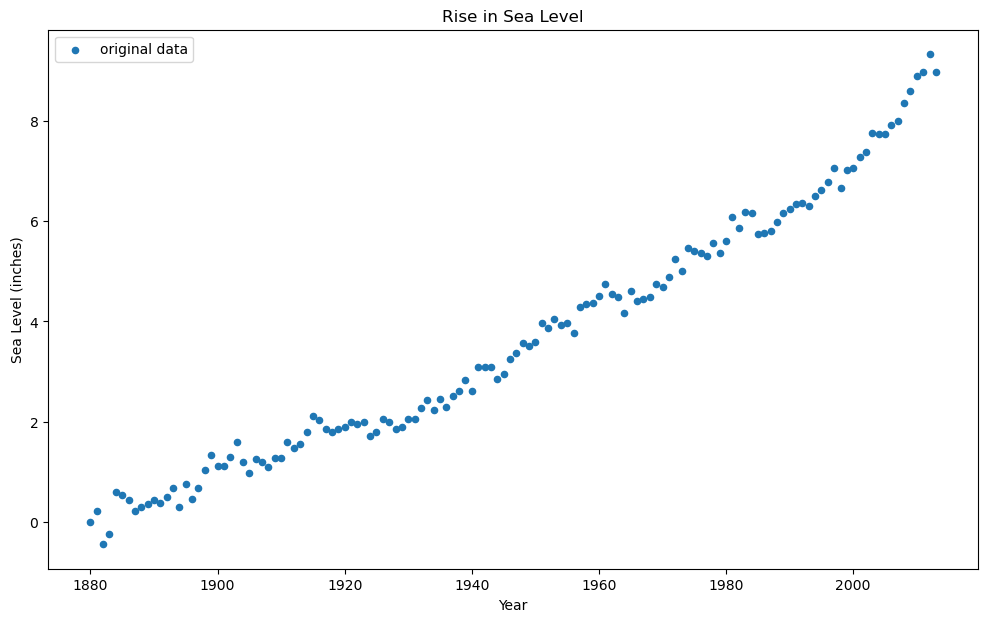

In [6]:
df.plot.scatter('Year','CSIRO Adjusted Sea Level', 
                label='original data',
               figsize=(12,7))
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.show()

<H4> - Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

<H4> -Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

<H4> - The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

In [4]:
sr1 = pd.Series([int(i) for i in range(1880,2051)])
df_2000 = df[df['Year'] >= 2000]
yearto2050_2 = pd.Series([int(i) for i in range(2000,2051)])
#df_2000['Year'] = df_2000['Year'].append(yearto2050_2, ignore_index=True)
#for year in range(2000,2051):
    #df_2000 = df_2000.append({'Year':year,
                           # 'CSRIO Adjusted Sea Level':None,
                            #'Lower Error Bound':None,
                            #'Upper Error Bound':None,
                            #'NOAA Adjusted Sea Level':None},
                            #ignore_index = True)
df_2000

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


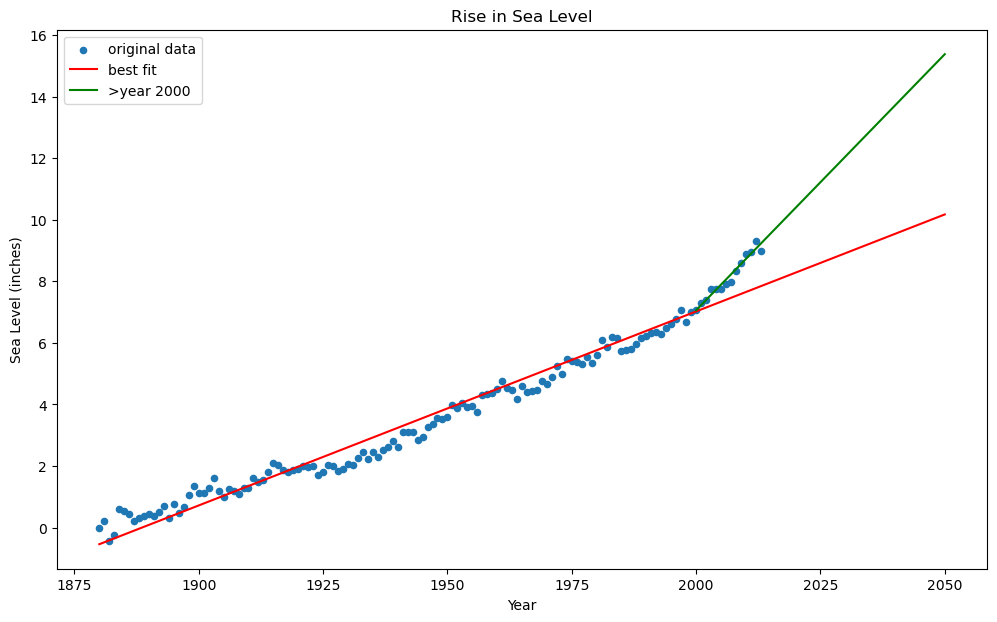

In [5]:
# Use matplotlib to create a scatter plot using the "Year" column as the x-axis and
# the 'CSIRO Adjusted Sea Level' column as the y-axis
df.plot.scatter('Year','CSIRO Adjusted Sea Level', 
                label='original data',
               figsize=(12,7))
# Use the linregress fundtion from scipy.stats to get slope and y-intercept
# Plot the line best fit
# Plot the line of best fit over the top of the scatter plot (go through 2050)
# to predict the sea level rise in 2050

yearto2050 = pd.Series([int(i) for i in range(1880,2051)])
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'],df['CSIRO Adjusted Sea Level'])
plt.plot(yearto2050, intercept + slope*yearto2050, 'r', label='best fit')

# Plot a new line best fit started from year 2000
# Make the line go through year 2050
df_2000 = df[df['Year'] >= 2000]
slope_y, intercept_y, r_y, p_y, std_err_y = stats.linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
yearto2050_2 = pd.Series([int(i) for i in range(2000,2051)])

plt.plot(yearto2050_2, intercept_y + slope_y*yearto2050_2, 'g', label='>year 2000')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend(fontsize='medium')
plt.show()